In [9]:
import os
import numpy as np
from base import *

In [10]:
pth = r'\\10.99.68.52\Kiemendata\Valentina Matos\tissues for methods paper\human liver'
pthim = os.path.join(pth, '10x')
umpix = 1
pthtest = os.path.join(pth, 'testing image')
pthtestim = os.path.join(pthtest, '10x')
nm = 'CODA_python_01_06_2024_sametilesas12_03_2024_notGUI'
resolution = '10x'

WS = [[0, 0, 0, 0, 0, 0, 2], [7, 6], 
      [1, 2, 3, 4, 5, 6, 7], 
      [4, 6, 2, 3, 5, 1, 7], []]

numclass = max(WS[2])
sxy = 1024
pthDL = os.path.join(pth, nm)
nblack = numclass + 1
nwhite = WS[1][0]
cmap = np.array([[230, 190, 100],
                  [65, 155, 210],
                  [145, 35, 35],
                  [158, 24, 118],
                  [30, 50, 50],
                  [235, 188, 215],
                  [255, 255, 255]])
classNames = ['PDAC', 'bile duct', 'vasculature', 'hepatocyte','immune','stroma','whitespace']
classCheck = []
ntrain = 15
nvalidate = np.ceil(ntrain/5)
nTA = 2

In [ ]:
save_model_metadata_GUI(pthDL, pthim,pthtest, WS, nm, umpix, cmap, sxy, classNames, ntrain, nvalidate, nTA = 3,final_df = None, combined_df = None, model_type="DeepLabV3_plus", batch_size=3)

In [5]:
WSI2tif(pth, resolution, umpix)

In [ ]:
# Determine optimal TA
determine_optimal_TA(pthim, nTA)

In [ ]:
[ctlist0, numann0] = load_annotation_data(pthDL, pth, pthim, classCheck)

In [ ]:
create_training_tiles(pthDL, numann0, ctlist0)

TensorFlow is using the following GPU: LogicalDevice(name='/device:GPU:0', device_type='GPU')
Calculating class weights...
Class frequencies:
PDAC: 0.0374
bile duct: 0.0141
vasculature: 0.0327
hepatocyte: 0.2022
immune: 0.0164
stroma: 0.1694
whitespace: 0.1229
black: 0.4283

Class weights:
PDAC: 2.1416
bile duct: 5.6796
vasculature: 2.4501
hepatocyte: 0.3967
immune: 4.9027
stroma: 0.4735
whitespace: 0.6523
black: 0.1873
Class weights: [2.1415775253821714, 5.679601744126743, 2.450091260856633, 0.39670441603018936, 4.902737295789728, 0.47347612165684266, 0.652292533331192, 0.18725029616977043]
Starting model training...
Epoch 1/8
500/500 [==============================] - 219s 428ms/step - loss: 0.2288 - accuracy: 0.8952 - val_loss: 0.1600 - val_accuracy: 0.9282
Epoch 2/8
500/500 [==============================] - 195s 388ms/step - loss: 0.1130 - accuracy: 0.9405 - val_loss: 0.1980 - val_accuracy: 0.9330
Epoch 3/8
500/500 [==============================] - 198s 395ms/step - loss: 0.0798 

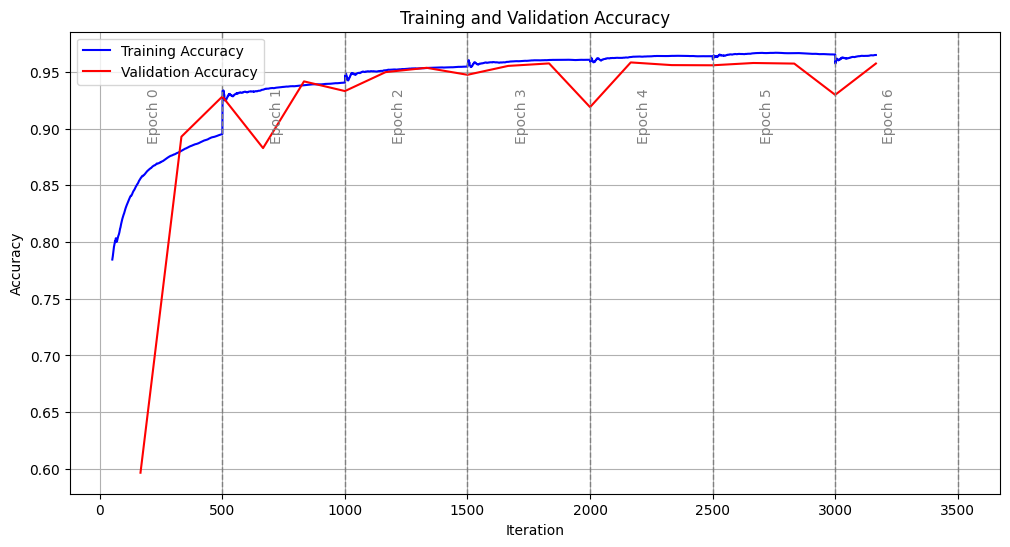

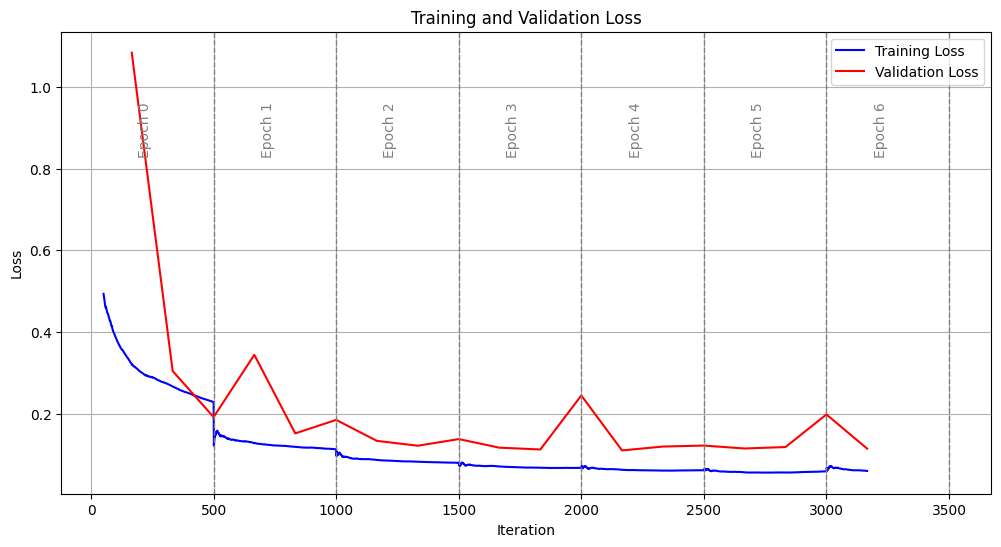

In [11]:
train_segmentation_model_cnns(pthDL)

Testing segmentation model......
 
Importing annotation data...
Image 1 of 1: Liv-17_0101
 annotation data previously loaded
   
  Starting classification of image 1 of 1: Liv-17_0101.tif
Image 1 of 1 took 228 s
  Total time for classification: 0.0h 5.0m 17.360588312149048s


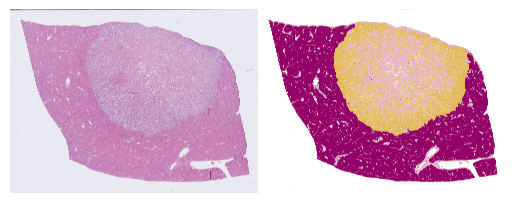


Calculating total number of pixels in the testing dataset...
  There are 374634 pixels of PDAC, 33% of the most common class.
  There are 23149 pixels of bile duct, 2% of the most common class.
  There are 20161 pixels of vasculature, 1% of the most common class.
  There are 1132362 pixels of hepatocyte. This is the most common class.
  There are 14449 pixels of immune, 1% of the most common class.
  There are 313524 pixels of stroma, 27% of the most common class.
  There are 778284 pixels of whitespace, 68% of the most common class.

  Only 14449 testing pixels of immune found.
    We suggest a minimum of 15,000 pixels for a good assessment of model accuracy.
    Confusion matrix may be misleading.


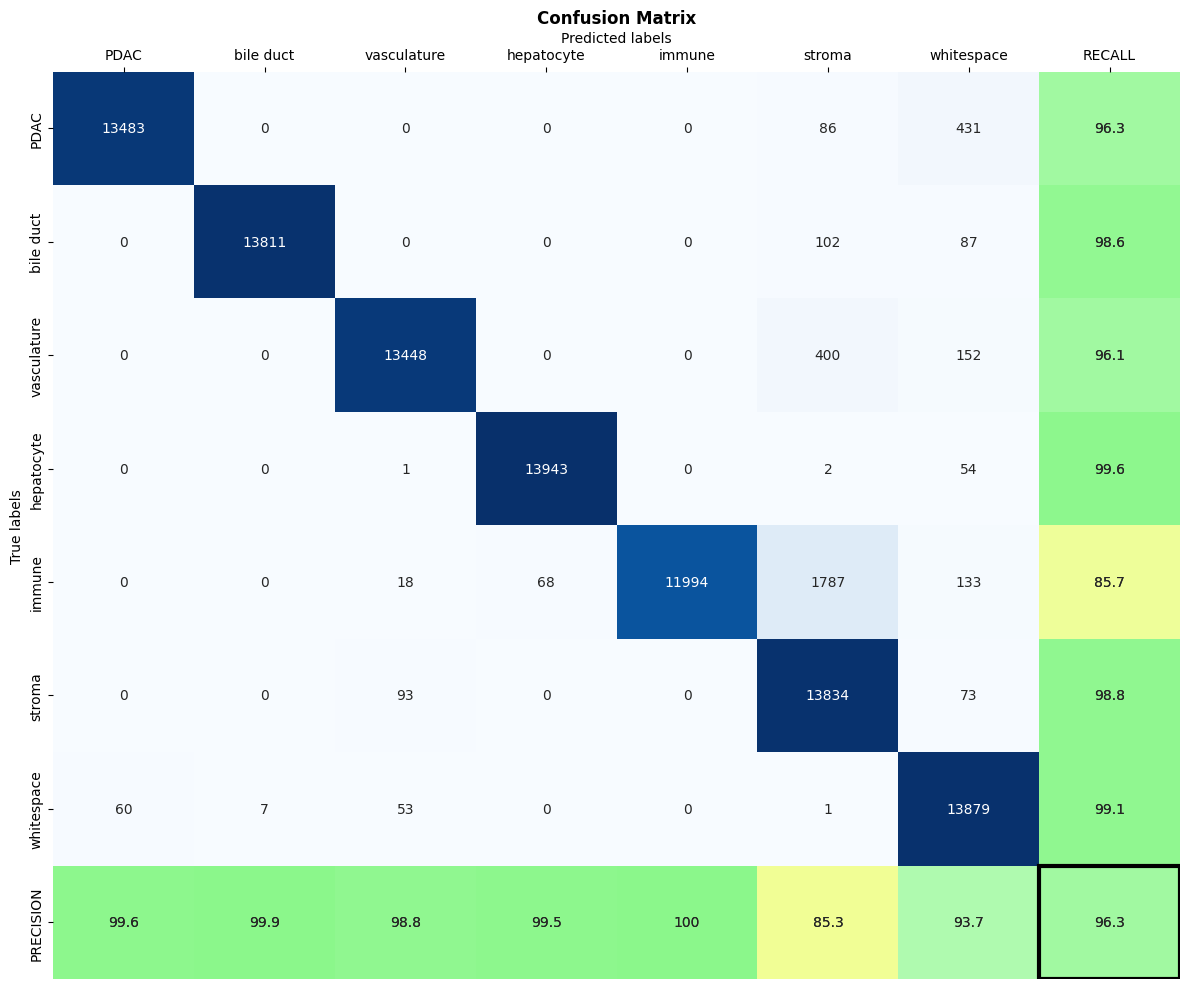


Confusion matrix saved to \\10.99.68.52\Kiemendata\Valentina Matos\tissues for methods paper\human liver\CODA_python_01_06_2024_sametilesas12_03_2024_notGUI\confusion_matrixDeepLabV3_plus.jpg

Overall Accuracy: 96.3%


In [12]:
WSI2tif(pthtest, resolution, umpix)
test_segmentation_model(pthDL,pthtest, pthtestim, cnn_name = "DeepLabV3_plus")

In [ ]:
classify_images(pthim,pthDL, name = "DeepLabV3_plus")